[colab](https://colab.research.google.com/github/julialintern/Intro_to_Deep_Learning/blob/main/02_Convolutional_NN_colab_.ipynb)

<img src='new_img/odsc.png'>

#   Keeping up with the Deep-Learning Curve via Keras
<img src='new_img/entree.png' align='middle'/>


<img src='new_img/cnn_new.png'/>

credits: [karpathy@stanford](http://cs231n.github.io/convolutional-networks/)

- pixels have a natural topology 
- robust to different orientations
- CNNs are based on what we know about images
- We will not be relying as heavily on the fully-connected structure (shown left) --> too many parameters !


<img src='new_img/cnn_family_a.png'/>

<img src='new_img/cnn_family.png'/>
<img src='new_img/many_architectures.png'/>
* bubble size is # of parameters
* AlexNet  (62 million parameters) (final layer 6x 6 x 256 x 2096) ~ > 1/2 are coming from FC layer

<img src='new_img/input.png'/>

<img src='new_img/conv1.png'/>

<img src='new_img/conv_title.png'/>

<img src='new_img/3D_Convolution_Animation.gif'/>

**Definition of Convolution:**
Integral that expresses overlap of one function as it is shifted over another

**In terms of CNNs:**
The input is one function, and the kernel is the other. We can implement the integral as 
a summation over a finite # of array elements.  The output is called the feature map (which we can think of as a weighted sum)

<img src='new_img/conv_a.png'/>
<img src='new_img/conv_bb.png'/>

<img src='new_img/conv_filter.png'/>

<img src='new_img/max_pool.png'/>


### Max-Pooling benefits: 

- Reduces parameters by 75% 
- Helps us to generalize our model: Provides an 'abstracted' form of our features

<img src='new_img/relu_1.png'/>

<img src='new_img/sigmoid_vs_relu.png'/>


<img src='new_img/fc.png'/>

<img src='new_img/all_layers.png'/>

Credits: [Yosinski](http://yosinski.com)




In [2]:
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Input, Dropout,  Conv2D, MaxPooling2D, ZeroPadding2D, ZeroPadding1D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.utils import model_to_dot, plot_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd

from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model
import matplotlib.pyplot as plt
import pandas as pd
from scipy import ndimage

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [9]:
import cv2

##  And now,  CNN in Keras! 


### Macroarchitecture of VGG16
<img src='new_img/VGG.png'/>

In [3]:
def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224,3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512,(3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

In [5]:
# grabbing classnames 
# !curl https://raw.githubusercontent.com/torch/tutorials/master/7_imagenet_classification/synset_words.txt -o synset_words.txt

In [5]:
model=VGG_16('/Users/julialintern/.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy')

2022-04-19 07:03:48.477950: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-19 07:03:48.479747: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [7]:
def prepare_image(image):
    im = cv2.resize(cv2.imread(image), (224, 224)).astype(np.float32)
    im = np.expand_dims(im, axis=0)
    return im

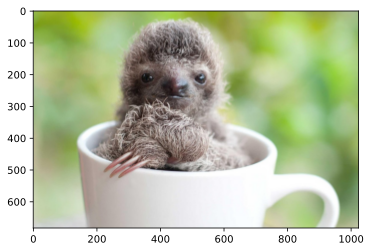

In [14]:
import imageio
im = imageio.imread('new_img/sloth.jpg')
plt.imshow(im);

In [19]:
img=prepare_image('new_img/sloth.jpg')
img=np.reshape(img,(1,224,224,3))

In [20]:
out = model.predict(img)
y_pred = np.argmax(out)

print (y_pred)

968


In [21]:
!sed -n 969p synset_words.txt

n07930864 cup


### Working with CNNs &  [CIFAR dataset ](https://www.cs.toronto.edu/~kriz/cifar.html)
- The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes

<img src ='new_img/cifar.png'/>

In [15]:
from tensorflow.keras.datasets import cifar10
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [16]:
X_train.shape

(50000, 32, 32, 3)

In [24]:
from tensorflow.keras.utils import to_categorical
y_test=to_categorical(y_test)
y_train=to_categorical(y_train)

###  Let's work with VGG16 model again

Lets import the model this time.   
We'll also be working with the functional api (in lieu of the Keras's sequential api)  



In [ ]:
#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(weights=None, include_top=False)

model_vgg16_conv.summary()

# Tailor our input format (Note- Tensorflow input order!)
inputs = Input(shape=(32,32,3),name = 'image_input')  # our input shape: (32,32,3)

## a layer instance is callable on a tensor, and returns a tensor
output_vgg16_conv = model_vgg16_conv(inputs) # using functional api syntax

#Add the fully-connected layers 
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(10, activation='softmax', name='predictions')(x)

#Create your own model 
my_model = Model(inputs=inputs, outputs=x)  # Using the Functional API

#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
my_model.summary()

### We are now dealing with the [Model class API](https://keras.io/models/model/)
aka the functional api

In [ ]:
# btw: functional API
print(type(model_vgg16_conv))


# as opposed to the Sequential API
model_seq=Sequential()  
model_seq.add(Dense(units=3,input_dim=4))  # output: # classes,input: # of features
model_seq.add(Activation("softmax"))

print(type(model_seq))

In [ ]:
my_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])


In [ ]:
cb=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

fit1=my_model.fit(X_train, y_train,
          batch_size=128, epochs=10, verbose=1,
          validation_data=(X_test, y_test),callbacks=[cb])

In [ ]:
plt.figure(figsize=(8,8))

plt.plot(range(3),fit1.history['accuracy'],marker='*',label='train')
plt.plot(range(3),fit1.history['val_accuracy'],marker='*',label='test')
plt.title('CIFAR: Training & Test Accuracy ')
plt.legend();


###  What do you think about our Accuracy ?  

Let's try again: 

### Let's repeat the MNIST training by leveraging [Transfer Learning](http://cs231n.github.io/transfer-learning/)

1) Reinstantiate your VGG16 model: this time set weights='imagenet'    
2) Freeze all previous layers      

hint: see Kera's [ImageDataGenerator Function](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)



In [25]:
#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = keras.applications.VGG16(weights='imagenet', include_top=False)

# freeze all convolutional weights ! 
for layer in model_vgg16_conv.layers:
    layer.trainable=False

#Create your own input format 
input = Input(shape=(32,32,3),name = 'image_input')  # our input shape: (3,32,32)

#Use the generated model 
output_vgg16_conv = model_vgg16_conv(input)
    

#Add the fully-connected layers 
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(10, activation='softmax', name='predictions')(x)

#Create your own model 
my_model = Model(inputs=input, outputs=x)  # Using the Functional API
my_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 32, 32, 3)]       0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              2101248   
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
_________________________________________________________________
predictions (Dense)          (None, 10)                40970     
Total params: 33,638,218
Trainable params: 18,923,530
Non-trainable params: 14,714,688
______________________________________

In [26]:
my_model.compile(optimizer='adam', loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [27]:
# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_datagen.fit(X_train)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

test_datagen = ImageDataGenerator(rescale=1. / 255)
validation_generator = test_datagen.flow(X_test, y_test, batch_size=32)



In [ ]:
# same callbacks!
cb=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

# num of steps : samples / batch size 
train_steps=np.round(X_train.shape[0]/32)

# num of test steps:
test_steps=np.round(X_test.shape[0]/32)

# fine-tune the model
fit2=my_model.fit_generator(
    train_generator,
    steps_per_epoch= train_steps,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=  test_steps,
    callbacks=[cb])

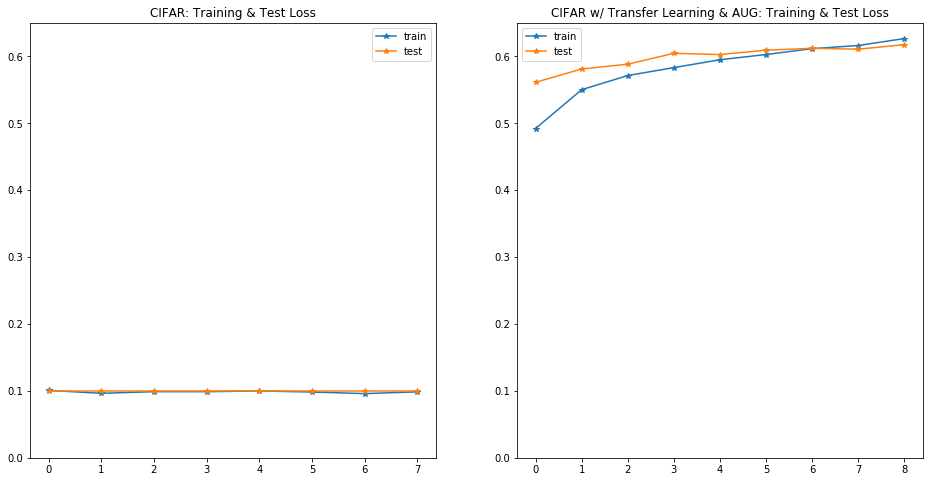

In [26]:
# visualize training process 
fig,ax=plt.subplots(1,2,figsize=(16,8))

ax[0].plot(range(len(fit1.history['acc'])),fit1.history['acc'],marker='*',label='train')
ax[0].plot(range(len(fit1.history['acc'])),fit1.history['val_acc'],marker='*',label='test')
ax[0].set_title('CIFAR: Training & Test Loss')
ax[0].set_ylim(0,.65)
ax[0].legend();


ax[1].plot(range(len(fit2.history['accuracy'])),fit2.history['accuracy'],marker='*',label='train')
ax[1].plot(range(len(fit2.history['accuracy'])),fit2.history['val_accuracy'],marker='*',label='test')
ax[1].set_title('CIFAR w/ Transfer Learning & AUG: Training & Test Loss')
ax[1].set_ylim(0,.65)
ax[1].legend();

### Take it one step further :  Fine-Tune 

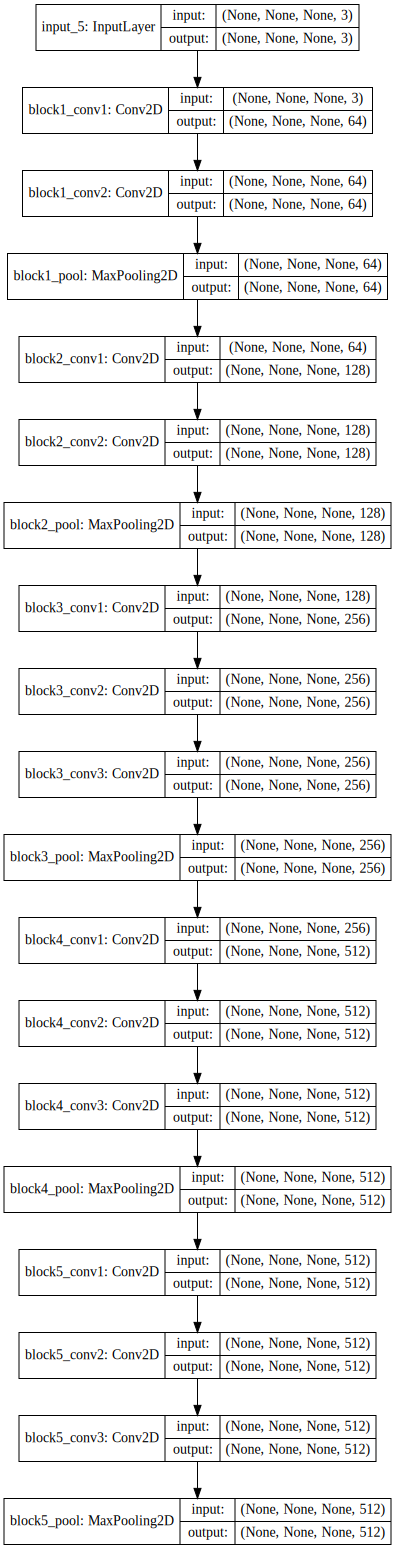

In [63]:
# first, lets review the architecture 

SVG(model_to_dot(model_vgg16_conv ,show_shapes=True).create(prog='dot',format='svg'))

In [4]:
#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = keras.applications.VGG16(weights='imagenet', include_top=False)

#  Fine-Tune Step a): Let's unfreeze the last convolutional block: 
for layer in model_vgg16_conv.layers[:15]:
    layer.trainable=False

#Create your own input format 
input = Input(shape=(32,32,3),name = 'image_input')  # our input shape: (3,32,32)

#Use the generated model 
output_vgg16_conv = model_vgg16_conv(input)
    

#Add the fully-connected layers 
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(10, activation='softmax', name='predictions')(x)

#Create your own model 
my_model = Model(inputs=input, outputs=x)  # Using the Functional API

In [5]:
#  Fine-Tune Step b): Reduce learning rate of optimizer: 

adam=keras.optimizers.adam(lr=.00001)
my_model.compile(optimizer=adam, loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [8]:
cb=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

# num of steps : samples / batch size 
train_steps=np.round(X_train.shape[0]/32)

# num of test steps:
test_steps=np.round(X_test.shape[0]/32)

# fine-tune the model
fit3=my_model.fit_generator(
    train_generator,
    steps_per_epoch= train_steps,
    nb_epoch=10,
    validation_data=validation_generator,
    validation_steps=  test_steps,
    callbacks=[cb])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=10, steps_per_epoch=1562.0, validation_data=<keras.pre..., callbacks=[<keras.ca..., validation_steps=312.0)`
  app.launch_new_instance()


Epoch 1/10
1562/1562 [==============================] - 109s - loss: 1.2383 - acc: 0.5674 - val_loss: 0.9432 - val_acc: 0.6643
Epoch 2/10
1562/1562 [==============================] - 107s - loss: 0.9529 - acc: 0.6651 - val_loss: 0.8494 - val_acc: 0.6995
Epoch 3/10
1562/1562 [==============================] - 107s - loss: 0.8680 - acc: 0.6970 - val_loss: 0.8057 - val_acc: 0.7203
Epoch 4/10
1562/1562 [==============================] - 107s - loss: 0.8167 - acc: 0.7123 - val_loss: 0.7841 - val_acc: 0.7227
Epoch 5/10
1562/1562 [==============================] - 108s - loss: 0.7709 - acc: 0.7290 - val_loss: 0.7984 - val_acc: 0.7204
Epoch 6/10
1562/1562 [==============================] - 107s - loss: 0.7366 - acc: 0.7400 - val_loss: 0.7565 - val_acc: 0.7306
Epoch 7/10
1562/1562 [==============================] - 108s - loss: 0.7105 - acc: 0.7502 - val_loss: 0.7559 - val_acc: 0.7309
Epoch 8/10
1562/1562 [==============================] - 107s - loss: 0.6847 - acc: 0.7572 - val_loss: 0.7192 - 

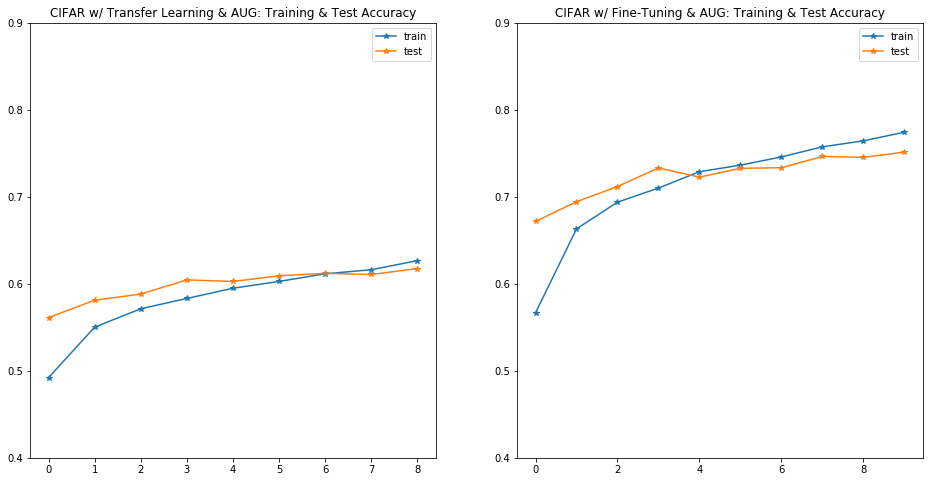

In [27]:
# visualization activations 

# visualize training process 
fig,ax=plt.subplots(1,2,figsize=(16,8))

ax[0].plot(range(len(fit2.history['accuracy'])),fit2.history['accuracy'],marker='*',label='train')
ax[0].plot(range(len(fit2.history['accuracy'])),fit2.history['val_accuracy'],marker='*',label='test')
ax[0].set_title('CIFAR w/ Transfer Learning & AUG: Training & Test Accuracy')
ax[0].set_ylim(.4,.9)
ax[0].legend();

ax[1].plot(range(10),fit3.history['accuracy'],marker='*',label='train')
ax[1].plot(range(10),fit3.history['val_accuracy'],marker='*',label='test')
ax[1].set_title('CIFAR w/ Fine-Tuning & AUG: Training & Test Accuracy')
ax[1].set_ylim(.4,.9)
ax[1].legend();

In [ ]:
#my_model.save_weights('cifar_fine_tune.h5')